In [52]:
#!pip install tensorflow
#!pip install numpy
#!pip install matplotlib

# Importing Libraries:

In [2]:
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten


In [30]:
import numpy as np
import matplotlib.pyplot as plt

# Loading the MNIST Dataset:

**The MNIST dataset is loaded using keras.datasets.mnist.load_data(). It contains 60,000 training images and 10,000 test images of handwritten digits (0 through 9).**

In [ ]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

# Data Preprocessing:

- **Reshaping:** The input images are reshaped from 28x28 matrices to flat arrays of size 784.
- **Normalization:** Pixel values are scaled to the range [0, 1].

In [3]:
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)

X_train = X_train/255
X_test = X_test/255

# Model Definition and Training:

## Model 1 :

A simple neural network with one hidden layer consisting of 10 neurons and a softmax output layer. It's trained using Stochastic Gradient Descent (SGD) optimizer.

### Model Initialization:

In [4]:
model = Sequential()

### Adding Layers:

- We add a Dense layer with 10 neurons (units) and specify the input dimensionality as 784. This layer is named "fc1".
- We add an Activation layer using the softmax activation function. Softmax converts the output values into probabilities, ensuring they sum up to 1.

In [6]:
model.add(keras.layers.Dense(10, input_dim=784, name="fc1"))
model.add(keras.layers.Activation('softmax'))

C:\Python311\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Model Summary:

In [7]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ fc1 (Dense)                          │ (None, 10)                  │           7,850 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 10)                  │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,850 (30.66 KB)

 Trainable params: 7,850 (30.66 KB)

 Non-trainable params: 0 (0.00 B)

### Compilation:

In [8]:
optimizer = keras.optimizers.SGD(learning_rate=0.5)
model.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=['accuracy'])

### Model Training:

In [9]:
model.fit(X_train, y_train, batch_size=300, epochs=10, verbose=1)

Epoch 1/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7998 - loss: 0.7036
Epoch 2/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9018 - loss: 0.3469
Epoch 3/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9121 - loss: 0.3122
Epoch 4/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9156 - loss: 0.2997
Epoch 5/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9187 - loss: 0.2918
Epoch 6/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9182 - loss: 0.2875
Epoch 7/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9229 - loss: 0.2800
Epoch 8/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9201 - loss: 0.2813
Epoch 9/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9223 - loss: 0.2819
Epoch 10/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9231 - loss: 0.2787


### Evaluation:

In [10]:
scores = model.evaluate(X_test, y_test, verbose=0)
print(f"{model.metrics_names[0]} : {scores[0]*100:.2f}")
print(f"{model.metrics_names[1]} : {scores[1]*100:.2f}")

loss : 27.53
compile_metrics : 92.29


## Model 2: 
Another neural network with one hidden layer consisting of 100 neurons and a softmax output layer. Also trained using SGD.

### Model Initialization:

In [ ]:
model2 = Sequential()

### Adding Layers:

- We add a Dense layer with 100 neurons (units) and specify the input dimensionality as 784.
- An Activation layer follows the Dense layer, using the sigmoid activation function.
- Next, we add another Dense layer with 10 neurons, representing the output layer.
- The output layer is followed by an Activation layer using the softmax activation function.

In [11]:
model2.add(Dense(100, input_dim=784))
model2.add(Activation('sigmoid'))

model2.add(Dense(10, input_dim=784))
model2.add(Activation('softmax'))

### Model Summary:

In [12]:
model2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,010 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 10)                  │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

### Compilation:

In [13]:
optimizer = keras.optimizers.SGD(learning_rate=0.5)
model2.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=['accuracy'])

### Model Training:

In [14]:
model2.fit(X_train, y_train, batch_size=300, epochs=10, verbose=1)

Epoch 1/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6977 - loss: 1.1443
Epoch 2/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8999 - loss: 0.3632
Epoch 3/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9122 - loss: 0.3084
Epoch 4/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9179 - loss: 0.2800
Epoch 5/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9256 - loss: 0.2548
Epoch 6/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9326 - loss: 0.2361
Epoch 7/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9371 - loss: 0.2208
Epoch 8/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9401 - loss: 0.2077
Epoch 9/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9431 - loss: 0.1971
Epoch 10/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9465 - loss: 0.1863


### Evaluation:

In [15]:
### Evaluation:scores = model2.evaluate(X_test, y_test, verbose=0)
print(f"{model2.metrics_names[0]} : {scores[0]*100:.2f}")
print(f"{model2.metrics_names[1]} : {scores[1]*100:.2f}")

loss : 17.91
compile_metrics : 94.97


## Model 3

### Data Preparation:



The input data X_train and X_test are reshaped to have dimensions (28, 28, 1) to represent images with height and width of 28 pixels and a single channel (grayscale).

In [16]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

### Model Initialization:

In [ ]:
model3 = Sequential()

### Layer Setup:

- **Convolutional Layers:** Three convolutional layers are added to extract features from the input images. Each convolutional layer is followed by a max-pooling layer to reduce spatial dimensions and extract the most important features.
  - The first convolutional layer (Conv2D) has 16 filters with a kernel size of (5, 5) and uses the ReLU activation function.
  - The second convolutional layer also has 32 filters with a kernel size of (5, 5) and uses ReLU activation.
  - The third convolutional layer has 64 filters with a kernel size of (5, 5) and ReLU activation.
- **Flattening Layer:** After the convolutional layers, the output is flattened to be fed into a dense layer.
- **Dense Layers:** Two dense layers are added for classification.
  - The first dense layer has 100 neurons with the sigmoid activation function.
  - The output layer has 10 neurons (equal to the number of classes) with the softmax activation function for multiclass classification.

In [18]:
Conv2D(32, kernel_size=(5, 5), activation='sigmoid', input_shape=(28, 28, 1), padding='same')

C:\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


<Conv2D name=conv2d, built=False>

In [20]:
MaxPooling2D(pool_size=(2, 2))

<MaxPooling2D name=max_pooling2d, built=False>

In [21]:
model3.add(Conv2D(16, kernel_size=(5, 5), activation='relu', padding="same"))
model3.add(MaxPooling2D(pool_size=(2, 2)))

model3.add(Conv2D(32, kernel_size=(5, 5), activation='relu', padding="same"))
model3.add(MaxPooling2D(pool_size=(2, 2)))

model3.add(Conv2D(64, kernel_size=(5, 5), activation='relu', padding="same"))
model3.add(MaxPooling2D(pool_size=(2, 2)))

model3.add(Flatten())

model3.add(Dense(100))
model3.add(Activation('sigmoid'))

model3.add(Dense(10))
model3.add(Activation('softmax'))

### Compilation:

In [22]:
optimizer = keras.optimizers.SGD(learning_rate=0.5)
model3.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=['accuracy'])

### Model Training:

In [23]:
model3.fit(X_train, y_train, batch_size=300, epochs=10, verbose=1)

Epoch 1/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 21s 101ms/step - accuracy: 0.6030 - loss: 1.1588
Epoch 2/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 20s 100ms/step - accuracy: 0.9720 - loss: 0.0940
Epoch 3/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 20s 101ms/step - accuracy: 0.9823 - loss: 0.0592
Epoch 4/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 21s 101ms/step - accuracy: 0.9875 - loss: 0.0430
Epoch 5/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 20s 102ms/step - accuracy: 0.9905 - loss: 0.0326
Epoch 6/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 20s 102ms/step - accuracy: 0.9928 - loss: 0.0254
Epoch 7/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 20s 102ms/step - accuracy: 0.9937 - loss: 0.0227
Epoch 8/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 20s 101ms/step - accuracy: 0.9940 - loss: 0.0194
Epoch 9/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 20s 101ms/step - accuracy: 0.9961 - loss: 0.0155
Epoch 10/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 20s 102ms/step - accuracy: 0.9975 - loss: 0.0113


### Evaluation:

In [26]:
scores = model3.evaluate(X_test, y_test, verbose=0)
print(f"{model3.metrics_names[0]} : {scores[0]*100:.2f}")
print(f"{model3.metrics_names[1]} : {scores[1]*100:.2f}")

loss : 2.96
compile_metrics : 98.99


# Model Comparison and Analysis


Let's compare the three models based on their loss and compile metrics:

1. **Model 1:**
   - Loss: 27.53
   - Compile Metrics: 92.29

2. **Model 2:**
   - Loss: 17.91
   - Compile Metrics: 94.97

3. **Model 3:**
   - Loss: 2.96
   - Compile Metrics: 98.99

Now, let's analyze why the second model is better than the first one and why the third one is the best:

**Comparison between Model 1 and Model 2:**

- **Loss:** Model 2 has a lower loss (17.91) compared to Model 1 (27.53). A lower loss indicates that the model's predictions are closer to the actual values, implying better performance.
  
- **Compile Metrics (Accuracy):** Model 2 has a higher compile metric (accuracy) of 94.97 compared to Model 1 (92.29). This means that Model 2 has a higher accuracy in predicting the correct labels for the test data.

**Explanation:**
Model 2 outperforms Model 1 because it has more complex architecture with an additional hidden layer of 100 neurons. The increased complexity allows the model to learn more intricate patterns and relationships in the data, leading to better performance in terms of accuracy and loss reduction.

**Comparison between Model 2 and Model 3:**

- **Loss:** Model 3 has the lowest loss (2.96) among all models, indicating the best performance in terms of minimizing prediction errors.

- **Compile Metrics (Accuracy):** Model 3 has the highest compile metric (accuracy) of 98.99, which implies that it achieves the highest accuracy in predicting the correct labels for the test data.

**Explanation:**
Model 3, being a convolutional neural network (CNN), is specifically designed for image data. It leverages convolutional and pooling layers to extract hierarchical features from the images, allowing it to capture intricate patterns present in the data. This architecture is well-suited for image classification tasks, resulting in superior performance compared to the other models.

**In summary, the superior performance of Model 2 over Model 1 is attributed to its increased complexity with an additional hidden layer, while the outstanding performance of Model 3 is due to its specialized architecture tailored for image data, which effectively captures relevant features for classification.**


# Displaying Images with Predictions:

Images with Predictions for Model 1
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
[2475, 3968, 3811, 359]


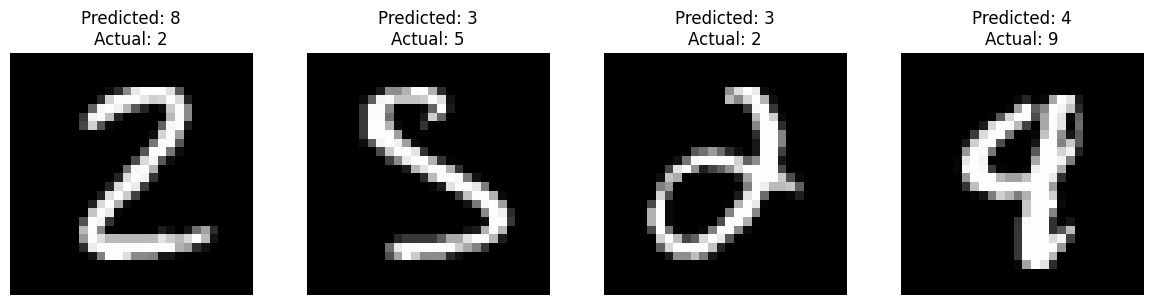

Images with Predictions for Model 2
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[2475, 3968, 3811, 359]


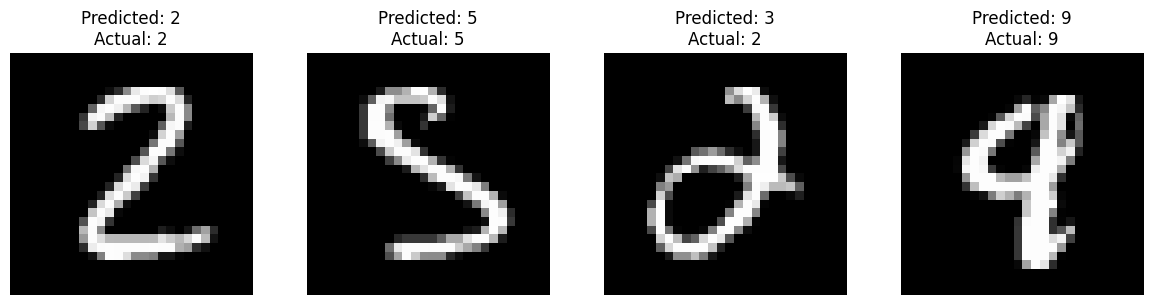

Images with Predictions for Model 3
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
[2475, 3968, 3811, 359]


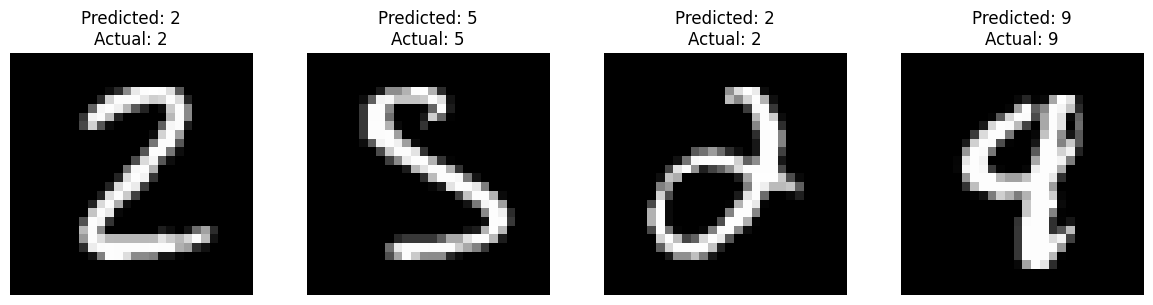

In [51]:
# Function to display images with predicted values
def display_images_with_predictions(model, X_test, y_test, num_images=15):
    # Reshape input data based on the model's input shape
    if model.input_shape[1:] == (28, 28, 1):
        X_test_reshaped = X_test.reshape(X_test.shape[0], 28, 28, 1)
    else:
        X_test_reshaped = X_test.reshape(X_test.shape[0], 784)
    # Get predictions
    predictions = model.predict(X_test_reshaped)
    # Randomly select num_images images
    #indices = np.random.choice(len(X_test), num_images, replace=False)
    indices = [2475 , 3968 , 3811, 359]
    print(indices)
    
    # Display each image with predicted value
    num_rows = (num_images // 5) + 1  # Ensure at least 1 row
    plt.figure(figsize=(15, 3 * num_rows))
    for i, index in enumerate(indices):
        plt.subplot(num_rows, 5, i + 1)
        plt.imshow(X_test[index].reshape(28, 28), cmap='gray')
        plt.title(f"Predicted: {np.argmax(predictions[index])}\nActual: {np.argmax(y_test[index])}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Display images with predictions for each model
print("Images with Predictions for Model 1")
display_images_with_predictions(model, X_test, y_test, num_images=4)

print("Images with Predictions for Model 2")
display_images_with_predictions(model2, X_test, y_test, num_images=4)

print("Images with Predictions for Model 3"), 
display_images_with_predictions(model3, X_test, y_test, num_images=4)

The displayed images with predictions showcase the performance of each model in predicting handwritten digits. Specifically, the indices `[2475, 3968, 3811, 359]` were selected due to the challenging nature of the digits they represent, leading to mispredictions by the first model.

- **Model 1**: Among the four selected images:
  - All four images were incorrectly predicted by Model 1.

- **Model 2**: In comparison, Model 2 showed improved performance:
  - Only one of the selected images (index 2475) was mispredicted, while the remaining three were correctly classified.

- **Model 3**: The convolutional model (Model 3) demonstrated the highest accuracy:
  - All four selected images were accurately classified, indicating robust performance even on challenging digit samples.

These results highlight the effectiveness of the models, with Model 3, the convolutional neural network, exhibiting the most reliable predictions, particularly on complex digit representations.
